<a href="https://colab.research.google.com/github/Gaskell-1206/AI_Autoimmune_disease/blob/main/ML_Model_GSM69372.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys

In [ ]:
!pip install --target=$nb_path autogluon autogluon==0.4.0

In [3]:
import numpy as np
import pandas as pd

In [43]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import copy

# Data Preparation

In [7]:
folder_path = '/content/drive/MyDrive/Autoimmune_Disease/Datasets/Autoantibodies_and_nucleic_acids/GSE69372_RAW'
all_data = pd.read_csv(os.path.join(folder_path,'AllMergedData.csv'))
all_data

,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_149,IgM_150,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender,Label
0,11021,12252,1,1,1,1,1,1,1,1,...,660,1,1,1,44080,43980,34434,34,Female,SLE
1,12396,13838,1,1,1,1,1,1,1,1,...,1904,1,1,1,42592,42421,41665,31,Female,UCTD
2,11083,12692,1,1,1,1,1,1,1,1,...,220,1,1,1,44185,44782,10094,38,Female,SLE
3,10407,10082,1,1,1,1,1,1,1,1,...,869,51,1,1,43895,43407,39912,30,Female,SjS
4,10263,11503,1,1,1,1,1,1,1,1,...,1,1,1,1,39734,44459,41131,23,Male,NHS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,13718,13972,1,1,1,1,1,1,1,1,...,57,188,167,176,10774,13971,14423,31,Male,NHS
421,12090,12422,1,1,1,1,1,1,1,1,...,963,1102,1108,1134,9686,11987,12454,47,Female,UCTD
422,14142,14321,1,1,1,1,1,1,1,5,...,214,324,347,332,14102,13922,11110,46,Male,NHS
423,12857,13130,1,1,1,1,1,1,1,1,...,411,273,276,267,12794,13689,21205,23,Female,NHS


In [8]:
all_data = all_data.replace(1,0)
all_data

,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_149,IgM_150,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender,Label
0,11021,12252,0,0,0,0,0,0,0,0,...,660,0,0,0,44080,43980,34434,34,Female,SLE
1,12396,13838,0,0,0,0,0,0,0,0,...,1904,0,0,0,42592,42421,41665,31,Female,UCTD
2,11083,12692,0,0,0,0,0,0,0,0,...,220,0,0,0,44185,44782,10094,38,Female,SLE
3,10407,10082,0,0,0,0,0,0,0,0,...,869,51,0,0,43895,43407,39912,30,Female,SjS
4,10263,11503,0,0,0,0,0,0,0,0,...,0,0,0,0,39734,44459,41131,23,Male,NHS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,13718,13972,0,0,0,0,0,0,0,0,...,57,188,167,176,10774,13971,14423,31,Male,NHS
421,12090,12422,0,0,0,0,0,0,0,0,...,963,1102,1108,1134,9686,11987,12454,47,Female,UCTD
422,14142,14321,0,0,0,0,0,0,0,5,...,214,324,347,332,14102,13922,11110,46,Male,NHS
423,12857,13130,0,0,0,0,0,0,0,0,...,411,273,276,267,12794,13689,21205,23,Female,NHS


In [44]:
all_data['C3_5'].unique()

array([-5.47935275e-02,  2.05667446e+01,  7.45401612e-02,  3.40392744e-01,
       -1.88675028e-02,  6.63726965e-01,  2.25429465e-01,  8.89105711e-02,
        1.32021801e-01, -4.04231176e-02, -3.32379127e-02,  9.60957760e-02,
        2.97281514e-01,  1.82318235e-01])

In [45]:
def load_data_and_get_class(path_to_data):
    data = pd.read_csv(path_to_data)
    data = data.replace(1,0)
    encoder = LabelEncoder()
    data.loc[data['Label'] == 'NHS', 'Label_new'] = 'NHS' 
    data.loc[data['Label'] == 'SLE', 'Label_new'] = 'SLE' 
    data.loc[data['Label'].isin(['UCTD','SjS','PsA','SSc']), 'Label_new'] = 'Other' 
    data['Gender'] = encoder.fit_transform(data['Gender'])
    data['Class'] = encoder.fit_transform(data['Label_new'])
    data['Class'] = data['Class'].astype("category")
    return data

In [46]:
all_data = load_data_and_get_class(os.path.join(folder_path,'AllMergedData.csv'))
all_data.head(10)

,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender,Label,Label_new,Class
0,11021,12252,0,0,0,0,0,0,0,0,...,0,0,44080,43980,34434,34,0,SLE,SLE,2
1,12396,13838,0,0,0,0,0,0,0,0,...,0,0,42592,42421,41665,31,0,UCTD,Other,1
2,11083,12692,0,0,0,0,0,0,0,0,...,0,0,44185,44782,10094,38,0,SLE,SLE,2
3,10407,10082,0,0,0,0,0,0,0,0,...,0,0,43895,43407,39912,30,0,SjS,Other,1
4,10263,11503,0,0,0,0,0,0,0,0,...,0,0,39734,44459,41131,23,1,NHS,NHS,0
5,16989,14406,0,0,0,0,0,0,0,0,...,0,0,44135,44199,43651,43,0,NHS,NHS,0
6,9986,10123,0,0,0,0,0,0,0,0,...,0,0,44218,44625,44427,31,0,SLE,SLE,2
7,14114,12243,0,0,0,0,0,0,0,0,...,1185,1146,9749,38135,44217,48,0,SLE,SLE,2
8,10414,11415,0,0,0,0,0,0,0,0,...,0,0,45103,44913,12647,28,0,SLE,SLE,2
9,14728,16959,0,0,0,0,0,0,0,0,...,0,0,43807,44451,38677,25,1,NHS,NHS,0


In [47]:
all_data['Label_new']

0        SLE
1      Other
2        SLE
3      Other
4        NHS
       ...  
420      NHS
421    Other
422      NHS
423      NHS
424      NHS
Name: Label_new, Length: 425, dtype: object

In [49]:
all_data = all_data.drop(columns=['Label','Label_new'])
all_data

KeyError: ignored

In [50]:
all_data['Class'].value_counts()

2    211
0    149
1     65
Name: Class, dtype: int64

# Train, test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_data, all_data.Class, test_size=0.3, random_state=42)

In [ ]:
X_train

,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_149,IgM_150,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender,Class
250,16425,18256,81,46,95,100,128,84,6,64,...,7496,1661,237,338,9628,11707,9425,60,0,1
397,14404,14389,1,1,1,1,1,1,1,1,...,324,1182,1141,1338,10690,10475,9460,46,0,1
118,30164,30065,1,1,1,1,1,1,1,1,...,7747,1221,1303,1108,11254,9881,10171,37,0,2
114,10504,11829,1,1,1,1,1,1,1,1,...,2308,1198,1,1,10591,10700,13668,37,0,2
137,13422,13216,1,1,1,1,1,1,1,1,...,597,2762,2697,2802,11995,9153,12927,42,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,14431,14181,1,1,1,1,1,1,1,1,...,1465,1,1,1,9747,9511,11291,43,0,2
106,11167,10236,1,1,1,1,1,1,1,1,...,1361,1,1,1,10295,10302,12733,31,0,2
270,14240,18962,1,1,1,1,1,1,1,1,...,242,1285,261,238,14450,10910,14549,43,0,1
348,14004,14174,1,1,1,1,1,1,1,1,...,413,1745,1768,1744,9878,9526,8968,45,0,2


In [ ]:
X_train_csv = '/content/drive/MyDrive/Autoimmune_Disease/Datasets/Autoantibodies and nucleic acids skew complement consumption in systemic lupus erythematosus [C4]/GSE69372_RAW/train.csv'
X_train.to_csv(X_train_csv,index=False)

In [ ]:
X_test_csv = '/content/drive/MyDrive/Autoimmune_Disease/Datasets/Autoantibodies and nucleic acids skew complement consumption in systemic lupus erythematosus [C4]/GSE69372_RAW/test.csv'
X_test.to_csv(X_test_csv,index=False)

In [ ]:
train_data = TabularDataset(X_train_csv)
subsample_size = 297
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head()

,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_149,IgM_150,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender,Class
111,17389,16659,1,1,1,1,1,1,1,1,...,664,1,1,1,9174,9239,9691,63,0,2
150,14179,15797,1,1,1,1,1,1,1,1,...,467,1847,2044,2057,9575,9393,11250,25,0,0
12,17153,6665,1,1,1,1,1,1,1,1,...,282,216,325,231,9171,11095,11793,55,1,0
216,18866,22724,10,1,1,1,1,1,1,1,...,735,146,127,207,9174,14897,9731,26,1,0
139,14623,14339,1,1,1,1,1,1,1,1,...,524,114,176,136,8642,8623,8797,66,0,1


In [ ]:
label = 'Class'
train_data[label] = train_data[label].astype('object')
print("Summary of class variable: \n", train_data[label].describe())

Summary of class variable: 
 count     297
unique      3
top         2
freq      146
Name: Class, dtype: int64


# Logistic Regression

In [ ]:
X = all_data.drop(columns=label)
y = all_data[label]
X['Gender'] = X['Gender'].astype('object')
X

,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_148,IgM_149,IgM_150,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender
0,11021,12252,1,1,1,1,1,1,1,1,...,790,660,1,1,1,44080,43980,34434,34,0
1,12396,13838,1,1,1,1,1,1,1,1,...,1845,1904,1,1,1,42592,42421,41665,31,0
2,11083,12692,1,1,1,1,1,1,1,1,...,307,220,1,1,1,44185,44782,10094,38,0
3,10407,10082,1,1,1,1,1,1,1,1,...,710,869,51,1,1,43895,43407,39912,30,0
4,10263,11503,1,1,1,1,1,1,1,1,...,1,1,1,1,1,39734,44459,41131,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,13718,13972,1,1,1,1,1,1,1,1,...,97,57,188,167,176,10774,13971,14423,31,1
421,12090,12422,1,1,1,1,1,1,1,1,...,955,963,1102,1108,1134,9686,11987,12454,47,0
422,14142,14321,1,1,1,1,1,1,1,5,...,196,214,324,347,332,14102,13922,11110,46,1
423,12857,13130,1,1,1,1,1,1,1,1,...,409,411,273,276,267,12794,13689,21205,23,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
X = all_data.drop(columns=label)
y = all_data[label]
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy',cv=cv,n_jobs=-1)

In [ ]:
print("Mean Accuracy: %.3f (%.3f)" % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.693 (0.059)


In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=0.01)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy',cv=cv,n_jobs=-1)

In [ ]:
print("Mean Accuracy: %.3f (%.3f)" % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.689 (0.070)


# AutoML

In [ ]:
train_data.Class = train_data.Class.astype('int64')
train_data.Class

111    2
150    0
12     0
216    0
139    1
      ..
251    1
192    0
117    0
47     2
172    2
Name: Class, Length: 297, dtype: int64

In [ ]:
save_path = '/content/drive/MyDrive/Autoimmune Disease/Datasets/Autoantibodies and nucleic acids skew complement consumption in systemic lupus erythematosus [C4]/GSE69372_RAW/Training_Results/agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(label=label, problem_type='multiclass', eval_metric='accuracy', path=save_path).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/Autoimmune Disease/Datasets/Autoantibodies and nucleic acids skew complement consumption in systemic lupus erythematosus [C4]/GSE69372_RAW/Training_Results/agModels-predictClass/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    297
Train Data Columns: 626
Label Column: Class
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12198.95 MB
	Train Data (Original)  Memory Usage: 1.49 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 8 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFea

In [ ]:
test_data = TabularDataset(X_test_csv)
y_test = test_data[label] # values to predict
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating
test_data_nolab.head()

Loaded data from: /content/drive/MyDrive/Autoimmune_Disease/Datasets/Autoantibodies and nucleic acids skew complement consumption in systemic lupus erythematosus [C4]/GSE69372_RAW/test.csv | Columns = 627 / 627 | Rows = 128 -> 128


,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_148,IgM_149,IgM_150,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender
0,17364,16366,13,1,1,1,1,1,1,1,...,297,273,216,1341,229,19055,14334,20165,54,0
1,13750,14173,1,1,1,1,1,1,1,1,...,1,1,1,1,1,11448,11180,11775,87,0
2,13840,13494,1,1,1,1,1,1,1,1,...,22852,22827,1,31,1,13214,13696,14864,49,0
3,12715,12193,1,1,1,1,1,1,1,1,...,1,1,1,120,209,40292,40049,21994,51,0
4,13195,12854,1,1,1,1,1,1,1,1,...,9273,9154,156,217,182,8606,10782,11004,32,0


In [ ]:
# from sklearn.utils.multiclass import type_of_target

In [ ]:
# type_of_target(np.array(list(y_pred)))

In [ ]:
predictor = TabularPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file
y_pred = predictor.predict(test_data_nolab)
print("GroundTruth:  \n", y_test)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=np.array(list(y_pred)), auxiliary_metrics=True, detailed_report=True)

Evaluation: accuracy on test data: 0.8046875
Evaluations on test data:
{
    "accuracy": 0.8046875,
    "balanced_accuracy": 0.6733222917433445,
    "mcc": 0.6685240045216466
}
Detailed (per-class) classification report:
{
    "0": {
        "precision": 0.8863636363636364,
        "recall": 0.8863636363636364,
        "f1-score": 0.8863636363636365,
        "support": 44
    },
    "1": {
        "precision": 0.5714285714285714,
        "recall": 0.21052631578947367,
        "f1-score": 0.3076923076923077,
        "support": 19
    },
    "2": {
        "precision": 0.7792207792207793,
        "recall": 0.9230769230769231,
        "f1-score": 0.8450704225352113,
        "support": 65
    },
    "accuracy": 0.8046875,
    "macro avg": {
        "precision": 0.7456709956709956,
        "recall": 0.6733222917433445,
        "f1-score": 0.6797087888637184,
        "support": 128
    },
    "weighted avg": {
        "precision": 0.7852069805194806,
        "recall": 0.8046875,
        "f1-

GroundTruth:  
 0      1
1      1
2      2
3      2
4      2
      ..
123    2
124    0
125    0
126    0
127    2
Name: Class, Length: 128, dtype: int64
Predictions:  
 0      2
1      2
2      2
3      2
4      2
      ..
123    0
124    0
125    0
126    0
127    2
Name: Class, Length: 128, dtype: int64


# Leaderboard

In [ ]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.812500,0.816667,0.035174,0.011940,4.379988,0.035174,0.011940,4.379988,1,True,5
1,LightGBMXT,0.804688,0.866667,0.037578,0.009698,3.358223,0.037578,0.009698,3.358223,1,True,4
2,WeightedEnsemble_L2,0.804688,0.866667,0.042938,0.010139,3.651966,0.005359,0.000441,0.293743,2,True,14
3,CatBoost,0.804688,0.816667,0.051882,0.014327,138.149450,0.051882,0.014327,138.149450,1,True,8
4,ExtraTreesEntr,0.789062,0.733333,0.123540,0.103144,1.046059,0.123540,0.103144,1.046059,1,True,10
5,RandomForestGini,0.781250,0.750000,0.119327,0.102922,1.390994,0.119327,0.102922,1.390994,1,True,6
6,ExtraTreesGini,0.781250,0.716667,0.120724,0.103037,1.049511,0.120724,0.103037,1.049511,1,True,9
7,XGBoost,0.773438,0.766667,0.018616,0.009591,6.484722,0.018616,0.009591,6.484722,1,True,11
8,RandomForestEntr,0.773438,0.750000,0.118075,0.103505,1.452661,0.118075,0.103505,1.452661,1,True,7
9,NeuralNetFastAI,0.773438,0.750000,0.295679,0.310625,12.052277,0.295679,0.310625,12.052277,1,True,3


# AUROC Metric

In [ ]:
print(f'y_true: {y_test}')
print(f'y_pred: {y_pred}')

y_true: 0      1
1      1
2      2
3      2
4      2
      ..
123    2
124    0
125    0
126    0
127    2
Name: Class, Length: 128, dtype: int64
y_pred: 0      2
1      2
2      2
3      2
4      2
      ..
123    0
124    0
125    0
126    0
127    2
Name: Class, Length: 128, dtype: int64


In [ ]:
predictor = TabularPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred_prop = predictor.predict_proba(test_data_nolab)
print("Predictions_Prop:  \n", y_pred_prop)
# perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True, detailed_report=True)

Predictions_Prop:  
                 0             1         2
0    1.114149e-03  9.877510e-02  0.900111
1    2.663673e-06  3.657274e-01  0.634270
2    6.409297e-04  1.338105e-03  0.998021
3    3.848001e-09  1.249075e-07  1.000000
4    6.611783e-07  1.321047e-05  0.999986
..            ...           ...       ...
123  4.918325e-01  1.133972e-01  0.394770
124  9.993950e-01  4.272643e-05  0.000562
125  9.968950e-01  3.094400e-03  0.000011
126  9.984826e-01  1.004548e-04  0.001417
127  1.067616e-07  1.087878e-06  0.999999

[128 rows x 3 columns]


In [ ]:
roc_auc_score(y_test, y_pred_prop, multi_class='ovr')

0.9471888433561538

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
# Binarize the output
y_true = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_true.shape[1]

y_score = np.array(y_pred_prop)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

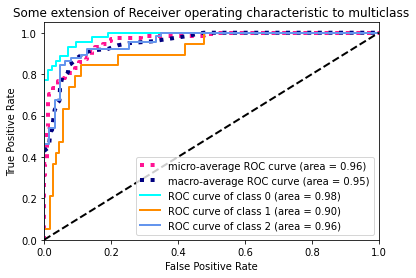

In [ ]:
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

AUPR (for each)

# Confusion Matrix

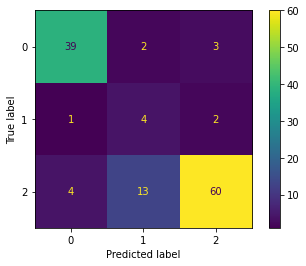

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = predictor.predict(test_data_nolab)
ConfusionMatrixDisplay.from_predictions(y_pred, y_test)

# Feature Importance

In [ ]:
predictor = TabularPredictor.load(save_path)
feature_importance = predictor.feature_importance(data=train_data,model=None)
feature_importance.head(10)

These features in provided data are not utilized by the predictor and will be ignored: ['IgM_75', 'IgM_95']
Computing feature importance via permutation shuffling for 624 features using 297 rows with 3 shuffle sets...
	410.66s	= Expected runtime (136.89s per shuffle set)
	58.67s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Age,0.026936,0.008908,0.017289,3,0.077981,-0.024109
IgG_56,0.007856,0.001944,0.009902,3,0.018995,-0.003283
Gender,0.004489,0.005143,0.134852,3,0.033960,-0.024982
C4_78,0.004489,0.001944,0.028595,3,0.015628,-0.006650
IgG_54,0.004489,0.001944,0.028595,3,0.015628,-0.006650
IgG_81,0.004489,0.003888,0.091752,3,0.026767,-0.017789
C4_138,0.004489,0.001944,0.028595,3,0.015628,-0.006650
C3_59,0.004489,0.001944,0.028595,3,0.015628,-0.006650
C3_87,0.003367,0.000000,0.500000,3,0.003367,0.003367
C3_98,0.003367,0.000000,0.500000,3,0.003367,0.003367


# Data Transformation

In [54]:
all_data_preprocessed = copy.deepcopy(all_data)
all_data_preprocessed

,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_149,IgM_150,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender,Class
0,11021,12252,0,0,0,0,0,0,0,0,...,660,0,0,0,44080,43980,34434,34,0,2
1,12396,13838,0,0,0,0,0,0,0,0,...,1904,0,0,0,42592,42421,41665,31,0,1
2,11083,12692,0,0,0,0,0,0,0,0,...,220,0,0,0,44185,44782,10094,38,0,2
3,10407,10082,0,0,0,0,0,0,0,0,...,869,51,0,0,43895,43407,39912,30,0,1
4,10263,11503,0,0,0,0,0,0,0,0,...,0,0,0,0,39734,44459,41131,23,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,13718,13972,0,0,0,0,0,0,0,0,...,57,188,167,176,10774,13971,14423,31,1,0
421,12090,12422,0,0,0,0,0,0,0,0,...,963,1102,1108,1134,9686,11987,12454,47,0,1
422,14142,14321,0,0,0,0,0,0,0,5,...,214,324,347,332,14102,13922,11110,46,1,0
423,12857,13130,0,0,0,0,0,0,0,0,...,411,273,276,267,12794,13689,21205,23,0,0


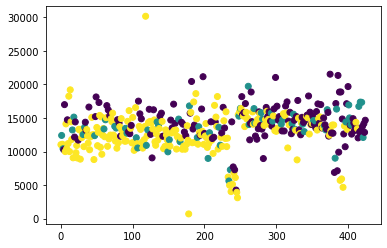

In [38]:
plt.scatter(np.arange(0,len(all_data_preprocessed['C3_0'])),all_data_preprocessed['C3_0'],c=all_data_preprocessed.Class)

In [55]:
min_max_scaler = preprocessing.MinMaxScaler()
all_data_preprocessed.iloc[:,0:624] = min_max_scaler.fit_transform(all_data_preprocessed.iloc[:,0:624])
# all_data_preprocessed.iloc[:,0:624] = preprocessing.scale(all_data_preprocessed.iloc[:,0:624])
all_data_preprocessed

,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_149,IgM_150,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender,Class
0,0.350380,0.336450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.015086,0.000000,0.000000,0.000000,0.958164,0.791237,0.704277,34,0,2
1,0.397041,0.395530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.043522,0.000000,0.000000,0.000000,0.918438,0.756807,0.896975,31,0,1
2,0.352484,0.352840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.005029,0.000000,0.000000,0.000000,0.960968,0.808949,0.055643,38,0,2
3,0.329544,0.255616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.019864,0.002872,0.000000,0.000000,0.953225,0.778583,0.850260,30,0,1
4,0.324657,0.308549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.842135,0.801815,0.882745,23,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.441903,0.400522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.001303,0.010587,0.008581,0.008688,0.068961,0.128509,0.171006,31,1,0
421,0.386657,0.342783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.022012,0.062060,0.056934,0.055978,0.039913,0.084693,0.118534,47,0,1
422,0.456292,0.413522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078125,...,0.004892,0.018246,0.017831,0.016389,0.157812,0.127427,0.082718,46,1,0
423,0.412685,0.369156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.009395,0.015374,0.014182,0.013180,0.122891,0.122281,0.351739,23,0,0


In [56]:
all_data_preprocessed
X_train, X_test, y_train, y_test = train_test_split(all_data_preprocessed, all_data_preprocessed.Class, test_size=0.3, random_state=42)

In [57]:
train_data = TabularDataset(X_train)
subsample_size = 297
train_data = train_data.sample(n=subsample_size, random_state=42)
train_data.head()

,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_149,IgM_150,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender,Class
206,0.355810,0.292829,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220696,0.000000,0.000000,0.000000,0.111491,0.096001,0.127169,39,0,2
337,0.453950,0.419780,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005212,0.004787,0.004008,0.003406,0.038499,0.032022,0.047302,57,0,1
196,0.530779,0.463625,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.183300,0.000000,0.000000,0.000000,0.047870,0.177978,0.125436,43,1,0
170,0.453814,0.398659,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.116517,0.104517,0.105341,0.154928,0.134206,0.101532,44,1,0
373,0.393647,0.274576,0.000758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218547,0.005969,0.007862,0.009873,0.115949,1.000000,0.314377,34,0,0


In [58]:
label = 'Class'
train_data[label] = train_data[label].astype('object')
print("Summary of class variable: \n", train_data[label].describe())

Summary of class variable: 
 count     297
unique      3
top         2
freq      146
Name: Class, dtype: int64


In [59]:
X = all_data.drop(columns=label)
y = all_data[label]
X['Gender'] = X['Gender'].astype('object')
X

,C3_0,C3_1,C3_2,C3_3,C3_4,C3_5,C3_6,C3_7,C3_8,C3_9,...,IgM_148,IgM_149,IgM_150,IgM_151,IgM_152,IgM_153,IgM_154,IgM_155,Age,Gender
0,11021,12252,0,0,0,0,0,0,0,0,...,790,660,0,0,0,44080,43980,34434,34,0
1,12396,13838,0,0,0,0,0,0,0,0,...,1845,1904,0,0,0,42592,42421,41665,31,0
2,11083,12692,0,0,0,0,0,0,0,0,...,307,220,0,0,0,44185,44782,10094,38,0
3,10407,10082,0,0,0,0,0,0,0,0,...,710,869,51,0,0,43895,43407,39912,30,0
4,10263,11503,0,0,0,0,0,0,0,0,...,0,0,0,0,0,39734,44459,41131,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,13718,13972,0,0,0,0,0,0,0,0,...,97,57,188,167,176,10774,13971,14423,31,1
421,12090,12422,0,0,0,0,0,0,0,0,...,955,963,1102,1108,1134,9686,11987,12454,47,0
422,14142,14321,0,0,0,0,0,0,0,5,...,196,214,324,347,332,14102,13922,11110,46,1
423,12857,13130,0,0,0,0,0,0,0,0,...,409,411,273,276,267,12794,13689,21205,23,0
